## Question 1

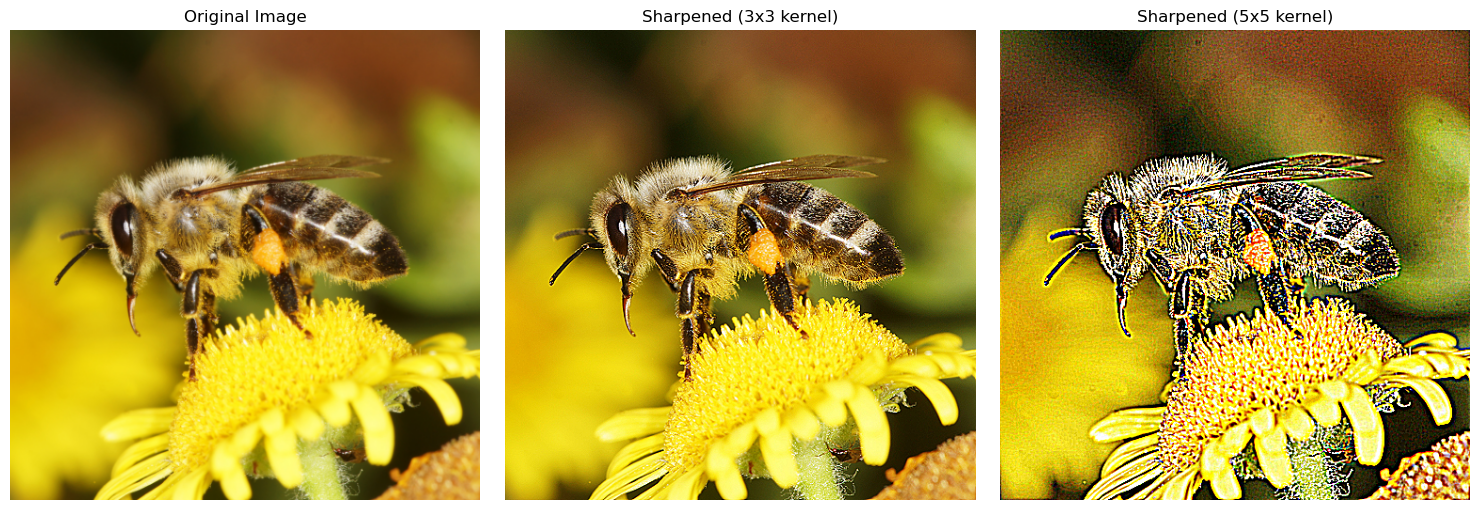

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Downloads/images/native-bee.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_3x3 = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])

# Apply the kernels
sharpened_3x3 = cv2.filter2D(img_rgb, -1, kernel_3x3)
sharpened_5x5 = cv2.filter2D(img_rgb, -1, kernel_5x5)

# Display the results
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(sharpened_3x3)
plt.title('Sharpened 3x3 kernel')

plt.subplot(133)
plt.imshow(sharpened_5x5)
plt.title('5x5 kernel')


plt.show()

## Question 2

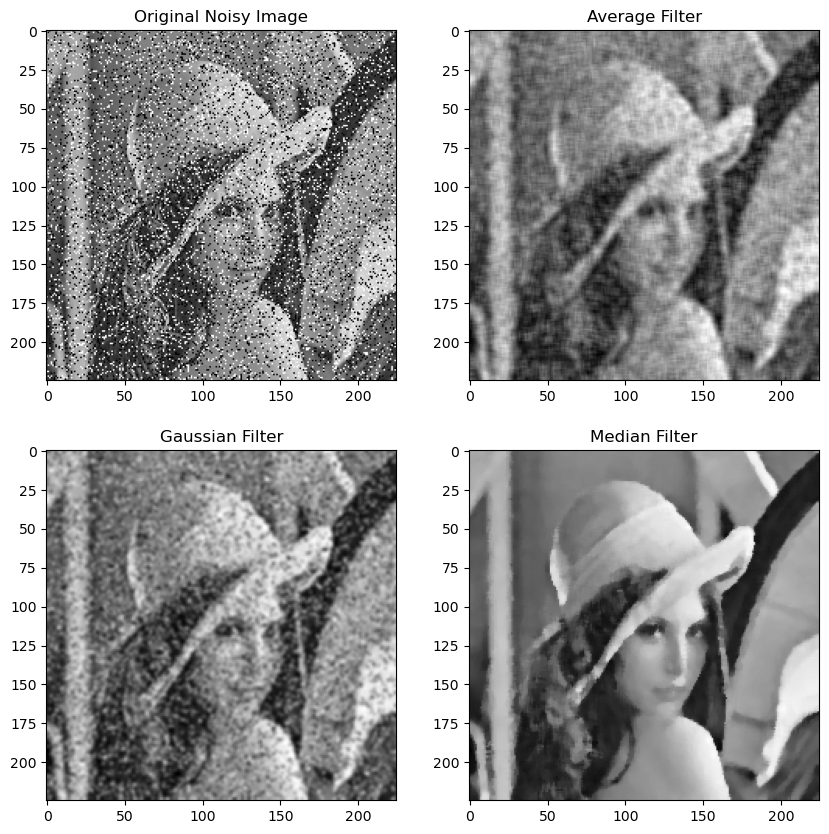

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("Downloads/images/noise_lena.jpg", cv2.IMREAD_GRAYSCALE)

# 1. Average filter
average_kernel = np.ones((5,5), np.float32) / 25
avg_filtered = cv2.filter2D(img, -1, average_kernel)

# 2. Gaussian filter
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 0)

# 3. Median filter
median_filtered = cv2.medianBlur(img, 5)

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original Noisy Image')

plt.subplot(222)
plt.imshow(avg_filtered, cmap='gray')
plt.title('Average Filter')

plt.subplot(223)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filter')


plt.subplot(224)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')



plt.show()

## Question 3

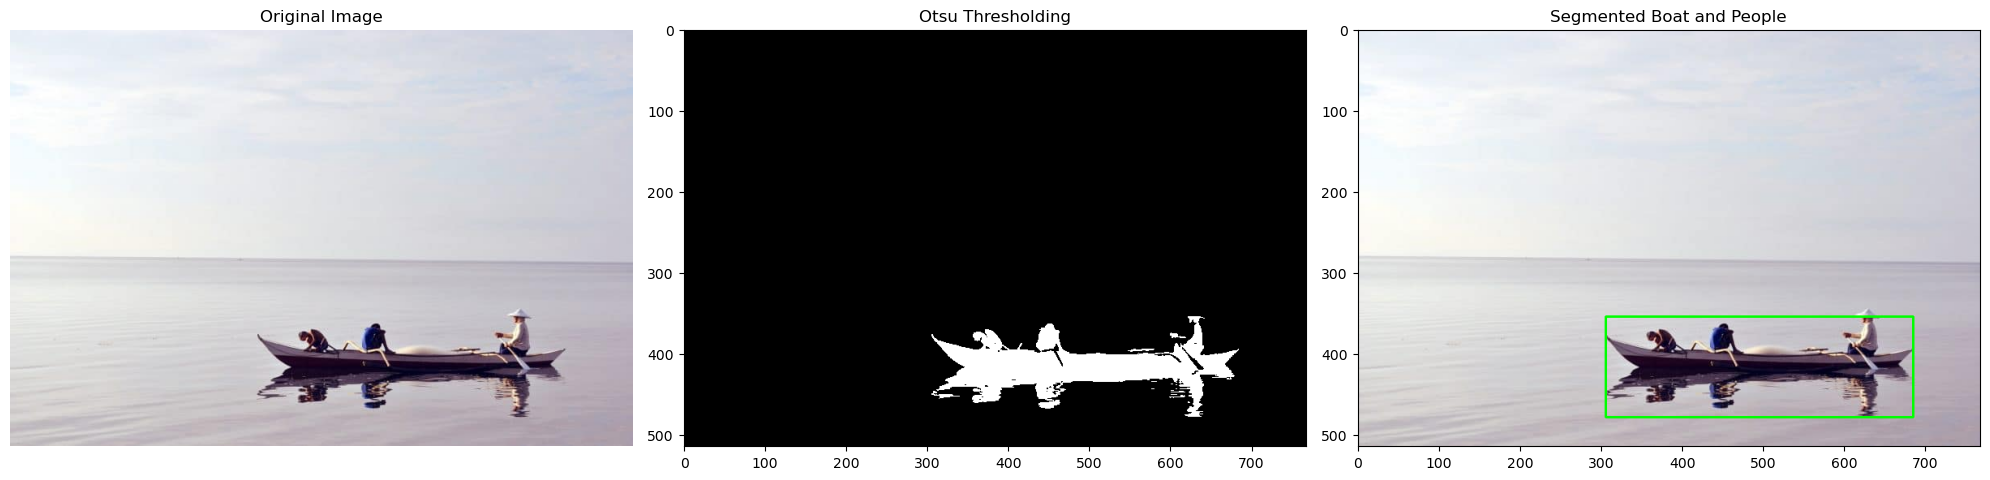

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Downloads/images/boat.jpg')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding rectangle
x, y, w, h = cv2.boundingRect(largest_contour)

#bounding box 
result = img.copy()
cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)


plt.figure(figsize=(20, 20))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Otsu Thresholding')

plt.subplot(133)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Boat and People')

plt.show()